# Computer Lab Semester - 5

Solve the s-wave Schrödinger equation for the ground state and the first excited state of the hydrogen atom
\begin{align}
&\frac{d^2u}{dr^2}=A(r)u(r),\\
&A(r) = \frac{2m}{\hbar^2}[V(r)-E],\\
\mbox{where, } &V(r)=-\frac{e^2}{r}
\end{align}
where, m is the reduced mass of the electron. Obtain the energy eigenvalues and plot the corresponding wave
functions. Remember that the ground state energy of the hydrogen atom is ≈-13.6 eV. Take e=3.795 (eVÅ),
ħc= 1973(eVÅ) and m=0.511×10$^6$ eV/c$^2$.

## Time independent Scrodinger equation
\begin{equation}
\frac{d^2\psi(x)}{dx^2} + k^2(x)\psi(x) = 0
\end{equation}
where,
\begin{equation}
k^2(x)=\frac{2m}{\hbar^2}(E-V(x))
\end{equation}

We split the second order differential equation into two first order equations as below -
\begin{equation}
\begin{aligned}
&\frac{d\psi}{dx}=\phi(x)\\
&\frac{d\phi}{dx}=-k^2(x)\psi(x)
\end{aligned}
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import bisect

In [2]:
# Basic parameters
E0   = -13.6     # approximate ground state energy
e    = 3.795      # charge of electron in eVA
hbarc = 1973   # in eVA
m    = 0.511e6    # in eV/c^2

# Based on the given parameters, calculate 2m/hbar^2c
C  = 2*m/hbarc**2

In [3]:
# Defining Helper Functions

def V(r):
    return - e**2/r 

def A(r):
    return C*(V(r)-E)

def dzdr(z, r):
    x, y = z
    dxdr = y
    dydr = A(r)*x
    dzdr = np.array([dxdr, dydr])
    return dzdr

def waveFunc(energy):
    global sol
    global E
    E = energy
    sol = odeint(dzdr, z[0], r)
    return sol[-1, 0]


In [13]:
# setting arrays for storing values

r = np.arange(1e-15, 8, 0.01)
z = np.zeros([len(r),2])
x0 = 0.001
y0 = 1
z[0] = [x0, y0]

In [19]:
# Finding energy eigen values

Energy = np.linspace(-20, 0, 100)
waveFuncRight = np.array([waveFunc(Eval) for Eval in Energy])
sign = np.sign(waveFuncRight)
eigenValue = []
for i in range(len(sign)-1):
    if sign[i] == - sign[i+1]:
        en = bisect(waveFunc, Energy[i], Energy[i+1])
        en = round(en,4)
        eigenValue += [en]

print('Energy Eigen Values are \n'+str(eigenValue))

Energy Eigen Values are 
[-13.7319, -3.4059, -0.7694]


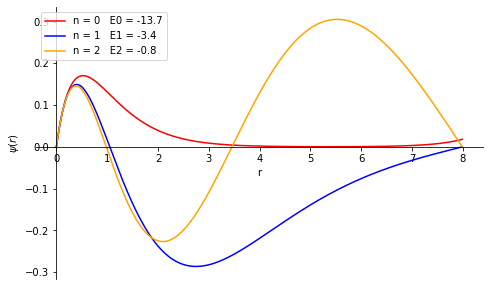

In [20]:
# Plotting wavefunctions

def plot():
    fig, ax = plt.subplots(figsize=(8, 5))
    # set the x-spine
    ax.spines['left'].set_position('zero')

    # turn off the right spine/ticks
    ax.spines['right'].set_color('none')
    ax.yaxis.tick_left()

    # set the y-spine
    ax.spines['bottom'].set_position('zero')

    # turn off the top spine/ticks
    ax.spines['top'].set_color('none')
    ax.xaxis.tick_bottom()

plot()

color = ['red', 'blue', 'orange']
for i in range(len(eigenValue)):
    waveFunc(eigenValue[i])
    plt.plot(r, sol[:,0], color=color[i], label='n = '+str(i)+'   E'+str(i)+' = '+str(round(eigenValue[i],1)))

plt.xlabel('r')
plt.ylabel('$\psi(r)$')
plt.legend()
#plt.grid()
plt.show()